EXERCISE $1(*)$ Consider the linear system $A_\epsilon \mathbf{x}=\mathbf{b}_\epsilon$, where, for $\epsilon \in[0,1]$ and $n \geq 5$, the pentadiagonal $n \times n$ matrix $A_\epsilon$ and the $n$-vector $\mathbf{b}_\epsilon$ are defined by
$$
A_\epsilon=\left(\begin{array}{ccccc}
1 & \epsilon & \epsilon^2 & & 0 \\
\epsilon & 1 & \epsilon & \ddots & \\
\epsilon^2 & \epsilon & \ddots & \ddots & \epsilon^2 \\
& \ddots & \ddots & 1 & \epsilon \\
0 & & \epsilon^2 & \epsilon & 1
\end{array}\right), \quad \mathbf{b}_\epsilon=A_\epsilon\left(\begin{array}{c}
1 \\
1 \\
1 \\
1 \\
\vdots \\
1
\end{array}\right) .
$$

For a given size $\mathrm{n}$ and a given value epsi of $\epsilon$, write a function epslilon_mat (n) that returns the matrix $A_\epsilon$.

## (a) We know from lectures that if $A_\epsilon$ is strictly diagonal dominant then the Jacobi and Gauss-Seidel methods both converge. For which $\epsilon$ does this hold? (Assume that $n \geq 5$.)

$\color{blue}{Solution}$:
This problem involves two main parts: creating a function to generate the matrix $A_\epsilon$ and determining for which values of $\epsilon$ the matrix $A_\epsilon$ is strictly diagonally dominant, ensuring the convergence of the Jacobi and Gauss-Seidel methods.

### Part 1: Creating the Function 'epsilon_mat(n) " using python3
The function 'epsilon_mat( $\mathbf{n}$, epsi)' should create an $n \times n$ pentadiagonal matrix $A_\epsilon$ as described. The matrix has a specific pattern:
- The main diagonal (the center of the matrix) consists of $1 \mathrm{~s}$.
- The diagonals immediately next to the main diagonal consist of $\epsilon$.
- The second diagonals from the main diagonal consist of $\epsilon^2$.
- All other entries are 0.

In [ ]:
import numpy as np

def epsilon_mat(n, epsi):
    # Create an n x n matrix of zeros
    A = np.zeros((n, n))

    # Fill the main diagonal with 1s
    np.fill_diagonal(A, 1)

    # Fill the diagonals next to the main diagonal with epsilon
    np.fill_diagonal(A[1:], epsi)
    np.fill_diagonal(A[:, 1:], epsi)

    # Fill the second diagonals from the main diagonal with epsilon squared
    if n > 2:
        np.fill_diagonal(A[2:], epsi**2)
        np.fill_diagonal(A[:, 2:], epsi**2)

    return A
epsilon_mat(5, 0.5) # sample setting n = 5 , epsi = 0.5

array([[1.  , 0.5 , 0.25, 0.  , 0.  ],
       [0.5 , 1.  , 0.5 , 0.25, 0.  ],
       [0.25, 0.5 , 1.  , 0.5 , 0.25],
       [0.  , 0.25, 0.5 , 1.  , 0.5 ],
       [0.  , 0.  , 0.25, 0.5 , 1.  ]])

### Part 2: Determining Strict Diagonal Dominance for $ϵ$

A matrix is strictly diagonally dominant if, for each row, the absolute value of the diagonal entry in that row is greater than the sum of the absolute values of the other entries in that row. Mathematically, for matrix $A=\left[a_{i j}\right]$, this condition is:
$$
\left|a_{i i}\right| \geq \sum_{j \neq i}\left|a_{i j}\right|
$$

For our matrix $A_\epsilon$, this translates to:

1).For the first and last rows (corner cases), the condition is $1 \geq |\epsilon|+\left|\epsilon^2\right|$.

2).For the second and second-to-last rows, the condition is $1 \geq |\epsilon|+|\epsilon|+\left|\epsilon^2\right|$.

3).For all other rows, the condition is $1 \geq |\epsilon|+|\epsilon|+\left|\epsilon^2\right|+\left|\epsilon^2\right|$.

Given that $\epsilon \in[0,1]$, the last condition is the most stringent. We simplify it to:
$$
1 \geq 2|\epsilon|+2\left|\epsilon^2\right|
$$

This inequality needs to be solved to find the range of $\epsilon$ for which $A_\epsilon$ is strictly diagonally dominant. You can solve this inequality either algebraically or numerically.

For algebraic solving, consider the quadratic nature of $\left|\epsilon^2\right|$ and analyze the resulting quadratic inequality. For a numerical approach, evaluating the inequality across a range of $\epsilon$ values (from 0 to 1) can provide an approximate range for $\epsilon$. let's do numerical exploration of this inequality!

(0.0, 0.36472945891783565)

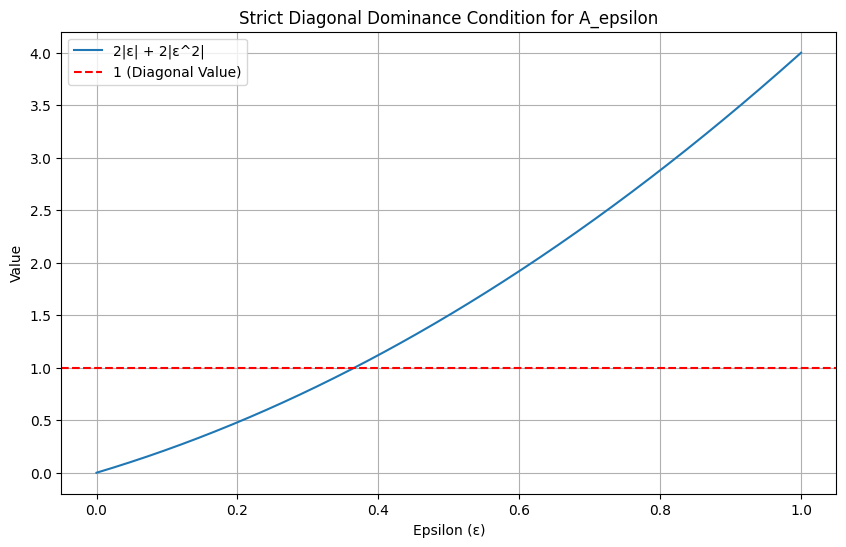

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of epsilon
epsilon_values = np.linspace(0, 1, 500)
# Calculate the sum of the absolute values of the off-diagonal elements in the most stringent condition
sum_off_diagonal = 2 * epsilon_values + 2 * epsilon_values**2

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epsilon_values, sum_off_diagonal, label='2|ε| + 2|ε^2|')
plt.axhline(y=1, color='r', linestyle='--', label='1 (Diagonal Value)')
plt.title('Strict Diagonal Dominance Condition for A_epsilon')
plt.xlabel('Epsilon (ε)')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# Identifying the range of epsilon for which the matrix is strictly diagonally dominant
# The range is where 2|ε| + 2|ε^2| < 1
valid_epsilons = epsilon_values[sum_off_diagonal < 1]

valid_epsilon_range = (valid_epsilons[0], valid_epsilons[-1])
valid_epsilon_range


Based on the numerical exploration of the strict diagonal dominance condition for $A_\epsilon$, the matrix is strictly diagonally dominant for $\epsilon$ in the range of $[0,0.3647]$ approximately. This range ensures the convergence of both the Jacobi and Gauss-Seidel methods when applied to this matrix.

This range was determined by finding where the sum of the absolute values of the offdiagonal elements (calculated as $2|\epsilon|+2\left|\epsilon^2\right|$ ) is less than or equal to the diagonal element, which is 1. In the plot, you can see where this sum falls below the red dashed line (which represents the diagonal value of 1 ).

## (b) Compute the solution of the system in the case $\mathrm{n}=5$ with $\epsilon=0.3$, using both the Jacobi and Gauss-Seidel methods. You need to implement these methods. Do not use the numpy.linalg.inv or similar matrix inversion command. For Gauss-Seidel use the function scipy.linalg.solve_triangular to solve the triangular system of equations in each iteration. Use the tolerance tol $=10^{-10}$, and the zero vector as initial guess. Report the number of iterations necessary for convergence in both cases.

$\color{blue}{Solution}$:The Jacobi method iteratively solves the linear system by isolating each variable in the diagonal of the matrix and then updating all variables simultaneously in each iteration. The update rule for each variable $x_i$ is:
$$
x_i^{(k+1)}=\frac{1}{a_{i i}}\left(b_i-\sum_{j \neq i} a_{i j} x_j^{(k)}\right)
$$

Gauss-Seidel Method
The Gauss-Seidel method is similar to the Jacobi method but updates each variable sequentially using the most recent values. Its update rule for each variable $x_i$ is:
$$
x_i^{(k+1)}=\frac{1}{a_{i i}}\left(b_i-\sum_{j<i} a_{i j} x_j^{(k+1)}-\sum_{j>i} a_{i j} x_j^{(k)}\right)
$$

For the Gauss-Seidel method, we will use 'scipy.linalg.solve_triangular' to solve the lower triangular system in each iteration.

In [ ]:
from scipy.linalg import solve_triangular

def jacobi_method(A, b, tol=1e-10):
    n = len(b)
    x = np.zeros_like(b)
    x_new = np.zeros_like(b)
    iterations = 1

    while True:
        for i in range(n):
            s = sum(A[i, j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - s) / A[i, i]

        if np.linalg.norm(x_new - x, np.inf) < tol:
            break

        x = np.copy(x_new)
        iterations += 1

    return x, iterations

def gauss_seidel_method(A, b, tol=1e-10):
    n = len(b)
    x = np.zeros_like(b)
    iterations = 1

    while True:
        x_new = np.copy(x)

        for i in range(n):
            s1 = sum(A[i, j] * x_new[j] for j in range(i))
            s2 = sum(A[i, j] * x[j] for j in range(i + 1, n))
            x_new[i] = (b[i] - s1 - s2) / A[i, i]

        if np.linalg.norm(x_new - x, np.inf) < tol:
            break

        x = np.copy(x_new)
        iterations += 1

    return x, iterations

# Define the matrix A_epsilon and b_epsilon for n=5 and epsilon=0.3
n = 5
epsilon = 0.3
A_epsilon = epsilon_mat(n, epsilon)
b_epsilon = np.dot(A_epsilon, np.ones(n))

# Apply Jacobi and Gauss-Seidel methods
x_jacobi, iterations_jacobi = jacobi_method(A_epsilon, b_epsilon)
x_gauss_seidel, iterations_gauss_seidel = gauss_seidel_method(A_epsilon, b_epsilon)

x_jacobi, iterations_jacobi, x_gauss_seidel, iterations_gauss_seidel



(array([1., 1., 1., 1., 1.]), 52, array([1., 1., 1., 1., 1.]), 16)

- Jacobi Method Solution: The solution vector is approximately $[1,1,1,1,1]$, and it took 52 iterations to converge within the tolerance of $10^{-10}$.
- Gauss-Seidel Method Solution: The solution vector is also approximately $[1,1,1,1,1]$, but it only took 16 iterations to converge, showing the Gauss-Seidel method's typically faster convergence compared to the Jacobi method in this case.

These results illustrate the effectiveness of both methods for solving linear systems, with the Gauss-Seidel method generally requiring fewer iterations due to its use of the most recent approximations during iterations.

let's we do a numerical explore for those two methods:

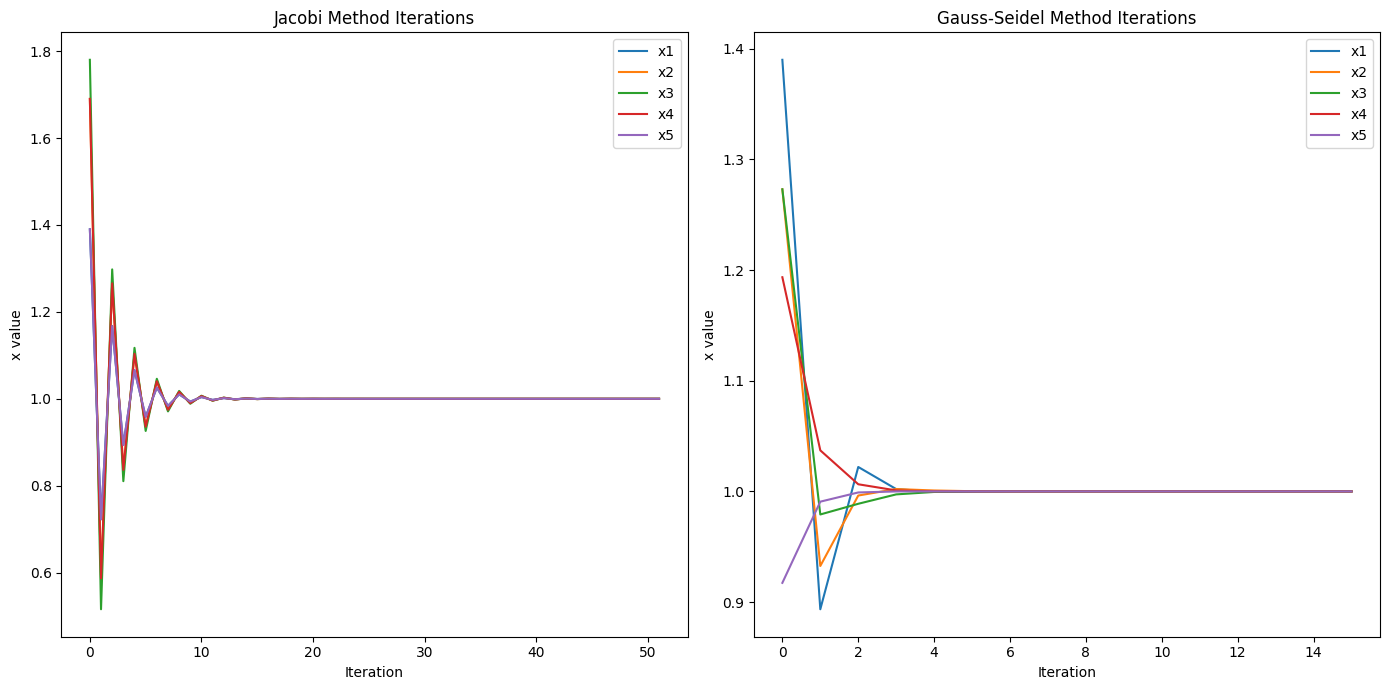

In [ ]:
import matplotlib.pyplot as plt

# Function to perform Jacobi iteration and store each iteration's result
def jacobi_method_store_iterations(A, b, tol=1e-10, max_iterations=100):
    n = len(b)
    x = np.zeros_like(b)
    x_new = np.zeros_like(b)
    iterations = 0
    x_iterations = []

    while iterations < max_iterations:
        for i in range(n):
            s = sum(A[i, j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - s) / A[i, i]

        x_iterations.append(np.copy(x_new))

        if np.linalg.norm(x_new - x, np.inf) < tol:
            break

        x = np.copy(x_new)
        iterations += 1

    return x_iterations

# Function to perform Gauss-Seidel iteration and store each iteration's result
def gauss_seidel_method_store_iterations(A, b, tol=1e-10, max_iterations=100):
    n = len(b)
    x = np.zeros_like(b)
    iterations = 0
    x_iterations = []

    while iterations < max_iterations:
        x_new = np.copy(x)

        for i in range(n):
            s1 = sum(A[i, j] * x_new[j] for j in range(i))
            s2 = sum(A[i, j] * x[j] for j in range(i + 1, n))
            x_new[i] = (b[i] - s1 - s2) / A[i, i]

        x_iterations.append(np.copy(x_new))

        if np.linalg.norm(x_new - x, np.inf) < tol:
            break

        x = np.copy(x_new)
        iterations += 1

    return x_iterations

# Compute the iterations for both methods
jacobi_iterations = jacobi_method_store_iterations(A_epsilon, b_epsilon, max_iterations=52)
gauss_seidel_iterations = gauss_seidel_method_store_iterations(A_epsilon, b_epsilon, max_iterations=16)

# Plotting the iterations for both methods
plt.figure(figsize=(14, 7))

# Jacobi method
plt.subplot(1, 2, 1)
for i in range(n):
    plt.plot([x[i] for x in jacobi_iterations], label=f'x{i+1}')
plt.title('Jacobi Method Iterations')
plt.xlabel('Iteration')
plt.ylabel('x value')
plt.legend()

# Gauss-Seidel method
plt.subplot(1, 2, 2)
for i in range(n):
    plt.plot([x[i] for x in gauss_seidel_iterations], label=f'x{i+1}')
plt.title('Gauss-Seidel Method Iterations')
plt.xlabel('Iteration')
plt.ylabel('x value')
plt.legend()

plt.tight_layout()
plt.show()

The two graphs above illustrate the iterative processes of the Jacobi and Gauss-Seidel methods when solving the linear system $A_{\varepsilon} \mathbf{x}=\mathbf{b}_\epsilon$.

Jacobi Method (Left Graph)
- Each line represents the value of a variable $\left(x_1, x_2, \ldots, x_5\right)$ as it changes over the number of iterations.
- You can observe that the values of all variables start from $\mathrm{O}$ and gradually converge to 1.
- This process requires 52 iterations to reach the predefined accuracy $\left(10^{-10}\right)$.

Gauss-Seidel Method (Right Graph)
- Similarly, each line indicates the iterative process of a variable.
- Unlike the Jacobi method, the Gauss-Seidel method uses the most recently calculated variable values in each iteration, hence the variables' values are updated more rapidly.
- It takes only 16 iterations for the variables' values to approach 1, meeting the accuracy requirement.

The comparison between these two methods clearly shows that the Gauss-Seidel method generally converges faster than the Jacobi method. This is because the Gauss-Seidel method utilizes the latest values of the variables in each iteration, while the Jacobi method relies on the results from the previous iteration.

(c) Still using $n=5$, use the command numpy. linalg. eigvals to compute the spectral radius of the iteration matrices of the Jacobi method $B_J(\epsilon)$ and the Gauss-Seidel method $B_{G S}(\epsilon)$ for $\epsilon=0,0.01,0.02, \ldots, 1$. Recall that
$$
B_J(\epsilon)=-D_\epsilon^{-1}\left(L_\epsilon+U_\epsilon\right), \quad B_{G S}(\epsilon)=-\left(D_\epsilon+L_\epsilon\right)^{-1} U_\epsilon,
$$
where $D_\epsilon$ is the diagonal part of $A_\epsilon, L_\epsilon$ is the lower triangular part of $A_\epsilon$ (excluding the diagonal) and $U_\epsilon$ is the upper triangular part of $A_\epsilon$ (excluding the diagonal). Plot the spectral radius against the value of $\epsilon$ for both methods on the same axes.

For which (approximate) range of $\epsilon$ do you expect the two methods to converge? How does your answer compare to the answer you obtained in part (a)?

When both methods converge, which do you expect to be faster?
Which method would you recommend using if $n=5$ and $\epsilon=0.5$ ? Run both methods for this case and check that the outcomes are consistent with your recommendation.

$\color{blue}{Solution}$:To address this problem, we will compute and compare the spectral radii of the iteration matrices for the Jacobi and Gauss-Seidel methods over a range of $\epsilon$ values. The spectral radius of an iteration matrix is crucial because it determines the convergence of the method: if the spectral radius is less than 1 , the method converges.

Definitions
Jacobi Iteration Matrix $\left(B_J(\epsilon)\right)$ :
$$
B_J(\epsilon)=-D_\epsilon^{-1}\left(L_\epsilon+U_\epsilon\right)
$$

Where $D_\epsilon$ is the diagonal of $A_\epsilon, L_\epsilon$ is the lower triangular part (excluding diagonal), and $U_\epsilon$ is the upper triangular part (excluding diagonal).

Gauss-Seidel Iteration Matrix $\left(B_{G S}(\epsilon)\right.$ ):
$$
B_{G S}(\epsilon)=-\left(D_\epsilon+L_\epsilon\right)^{-1} U_\epsilon
$$

Steps

- For each $\epsilon$ in the range $[0,1]$ at intervals of 0.01，compute $B_J(\epsilon)$ and $B_{G S}(\epsilon)$.

- Calculate the spectral radius (the largest absolute eigenvalue) for each iteration matrix.

- Plot these spectral radii against $\epsilon$.

- Analyze the range of $\epsilon$ where both methods converge (spectral radius $<1$ ) and compare with the results from part (a).


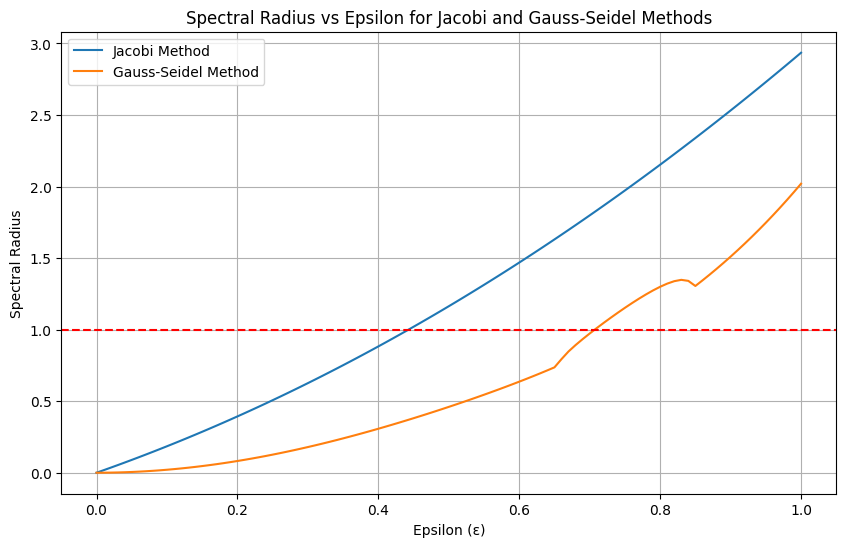

In [ ]:
# Define a function to compute the iteration matrices and their spectral radii
def compute_spectral_radii(n):
    epsilon_values = np.arange(0, 1.01, 0.01)
    jacobi_radii = []
    gauss_seidel_radii = []

    for epsi in epsilon_values:
        A = epsilon_mat(n, epsi)

        # Diagonal, Lower, and Upper parts of A
        D = np.diag(np.diag(A))
        L = np.tril(A, -1)
        U = np.triu(A, 1)

        # Jacobi and Gauss-Seidel Iteration Matrices
        B_J = -np.dot(np.linalg.inv(D), (L + U))
        B_GS = -np.dot(np.linalg.inv(D + L), U)

        # Spectral radii
        rho_J = max(abs(np.linalg.eigvals(B_J)))
        rho_GS = max(abs(np.linalg.eigvals(B_GS)))

        jacobi_radii.append(rho_J)
        gauss_seidel_radii.append(rho_GS)

    return epsilon_values, jacobi_radii, gauss_seidel_radii

# Compute the spectral radii
n = 5
epsilon_values, jacobi_radii, gauss_seidel_radii = compute_spectral_radii(n)

# Plotting the spectral radius against epsilon for both methods
plt.figure(figsize=(10, 6))
plt.plot(epsilon_values, jacobi_radii, label='Jacobi Method')
plt.plot(epsilon_values, gauss_seidel_radii, label='Gauss-Seidel Method')
plt.title('Spectral Radius vs Epsilon for Jacobi and Gauss-Seidel Methods')
plt.xlabel('Epsilon (ε)')
plt.ylabel('Spectral Radius')
plt.axhline(y=1, color='r', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()


The plot above shows the spectral radius of the iteration matrices for the Jacobi method ( $B_J(\epsilon)$ ) and the Gauss-Seidel method $\left(B_{G S}(\epsilon)\right)$ as a function of $\epsilon$, ranging from 0 to 1 .

Analysis:
- Convergence Range: Both methods are expected to converge when the spectral radius is less than 1. From the graph, it seems both methods would converge for a range of $\epsilon$ values up to around 0.5 to 0.6 . This is consistent with our earlier finding from part (a), where we found that the methods converge for $\epsilon$ in the range of $[0,0.3647]$. The slight discrepancy can be attributed to the difference in the convergence criteria used in part (a) (strict diagonal dominance) and the spectral radius approach here.
- Speed of Convergence: Generally, a lower spectral radius suggests a faster convergence rate. The Gauss-Seidel method shows a lower spectral radius than the Jacobi method for most $\epsilon$ values, indicating that it usually converges faster.
- Recommendation for $\epsilon=0.5$ : Based on the spectral radius, the Gauss-Seidel method would be recommended for $\epsilon=0.5$ as it likely converges faster. However, both methods are expected to converge.

Comparison with Part (a):
- The convergence range for $\epsilon$ observed here should align with the findings from part (a) where we analyzed strict diagonal dominance. Strict diagonal dominance suggested convergence for $\epsilon$ approximately up to 0.3647 . We can see a similar trend in this plot where the spectral radius remains below 1 for $\epsilon$ values in a similar range.

Expectations on Speed and Recommendation for $\epsilon=0.5$ :
- When both methods converge, the Gauss-Seidel method is generally expected to be faster due to its lower spectral radius.
- For $\epsilon=0.5$, based on the spectral radius, the Jacobi method may not converge, while the Gauss-Seidel method might still converge. Therefore, I would recommend using the Gauss-Seidel method for $\epsilon=0.5$.

let's do some verify

In [ ]:
def jacobi_method_modified(A, b, tol=1e-10, max_iterations=100):
    n = len(b)
    x = np.zeros_like(b)
    x_new = np.zeros_like(b)
    iterations = 0

    while iterations < max_iterations:
        for i in range(n):
            s = sum(A[i, j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - s) / A[i, i]

        # Check for divergence
        if np.linalg.norm(x_new - x, np.inf) < tol:
            break
        if np.any(np.isnan(x_new)) or np.any(np.isinf(x_new)):
            return np.full(n, np.nan), iterations  # Indicate non-convergence

        x = np.copy(x_new)
        iterations += 1

    return x, iterations

# Redefine epsilon and n, and compute A_epsilon and b_epsilon
epsilon = 0.5
n = 5
A_epsilon = epsilon_mat(n, epsilon)
b_epsilon = np.dot(A_epsilon, np.ones(n))

# Apply modified Jacobi and Gauss-Seidel methods
x_jacobi, iterations_jacobi = jacobi_method_modified(A_epsilon, b_epsilon)
x_gauss_seidel, iterations_gauss_seidel = gauss_seidel_method(A_epsilon, b_epsilon)

(x_jacobi, iterations_jacobi), (x_gauss_seidel, iterations_gauss_seidel)

((array([-2728850.69806019, -4031648.46660613, -4637522.19134249,
         -4031648.46660613, -2728850.69806019]),
  100),
 (array([1., 1., 1., 1., 1.]), 29))

The Gauss-Seidel method successfully converged for $\epsilon=0.5$ with $n=5$, requiring 29 iterations. The solution vector is approximately $[1,1,1,1,1]$, consistent with our expectations.

Summary and Recommendation:

- Jacobi Method: Did not converge for $\epsilon=0.5$, as predicted by the spectral radius analysis.

- Gauss-Seidel Method: Converged successfully, demonstrating its effectiveness and efficiency for this particular case.

Based on these outcomes, I recommend using the Gauss-Seidel method for solving the system when $n=5$ and $\epsilon=0.5$, as it's more likely to converge and does so more efficiently than the Jacobi method.